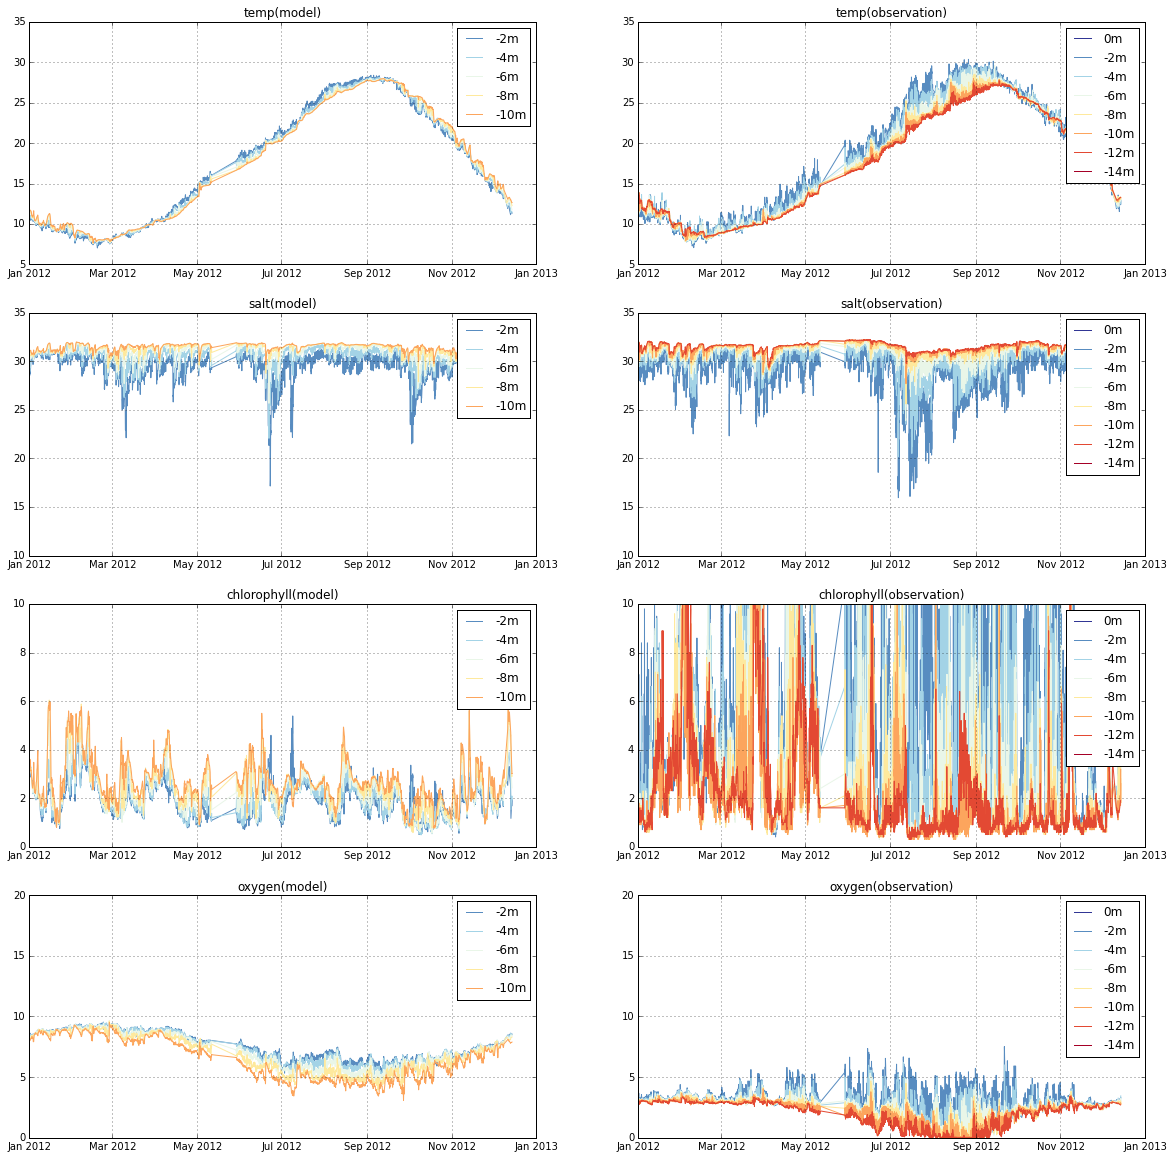

In [18]:
%matplotlib inline

import netCDF4
import matplotlib.pyplot as plt
import romspy
import numpy as np
import pandas as pd
from datetime import datetime

modfile = 'Z:/roms/Apps/OB500_fennelP/NL09/ob500_mod.nc'
obsfile = 'Z:/roms/Apps/OB500_fennelP/NL09/ob500_obs_2012_obweb-3.nc'
#obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'

mod = netCDF4.Dataset(modfile, 'r')
obs = netCDF4.Dataset(obsfile, 'r')

def plot(ax, vname, station, cff=1.0):
    var = obs.variables
    obs_type = var['obs_type'][:]
    obs_station = var['obs_station'][:]
    varids = {'temp':6, 'salt':7, 'chlorophyll':10, 'oxygen': 15}
    index = np.where((obs_type==varids[vname]) & (obs_station==station))
    
    obs_time = var['obs_time'][index]
    obs_time = netCDF4.num2date(obs_time, romspy.JST_days)
    obs_depth = var['obs_depth'][index]
    obs_value = var['obs_value'][index] * cff
    data = {"time":obs_time, "depth":obs_depth, "value":obs_value}
    df = pd.DataFrame(data)
    for d in range(0,-15,-2):
        t = df.time[df.depth==d]
        v = df.value[df.depth==d]
        ax[1].plot(t, v, '-', color=plt.cm.RdYlBu((14.0+d)/14.0), label='{}m'.format(d))
    
    mod_value = mod.variables['NLmodel_value'][index] * cff
    data2 = {"time":obs_time, "depth":obs_depth, "value":mod_value}
    df2 = pd.DataFrame(data2)
    df2 = df2[df2.value>0.0]
    df2 = df2[df2.value<35.0]
    for d in range(0,-15,-2):
        t = df2.time[df2.depth==d]
        if len(t) > 0:
            v = df2.value[df2.depth==d]
            ax[0].plot(t, v, '-', color=plt.cm.RdYlBu((14.0+d)/14.0), label='{}m'.format(d))

    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(vname+'(model)')
    ax[1].set_title(vname+'(observation)')
    ax[0].grid()
    ax[1].grid()
    ax[0].set_xlim(datetime(2012,1,1,0), datetime(2013,1,1,0))
    ax[1].set_xlim(datetime(2012,1,1,0), datetime(2013,1,1,0))

def sta_plot(station):
    fig, ax = plt.subplots(4, 2, figsize=[20,20])
    plot(ax[0], 'temp', station)
    plot(ax[1], 'salt', station)
    plot(ax[2], 'chlorophyll', station, cff=1.0)
    plot(ax[3], 'oxygen', station, cff=32.0/1000)
    ax[0][0].set_ylim(5.0,35.0)
    ax[0][1].set_ylim(5.0,35.0)
    ax[1][0].set_ylim(10.0,35.0)
    ax[1][1].set_ylim(10.0,35.0)
    ax[2][0].set_ylim(0.0,10.0)
    ax[2][1].set_ylim(0.0,10.0)
    ax[3][0].set_ylim(0.0,20.0)
    ax[3][1].set_ylim(0.0,20.0)
    
sta_plot(12)

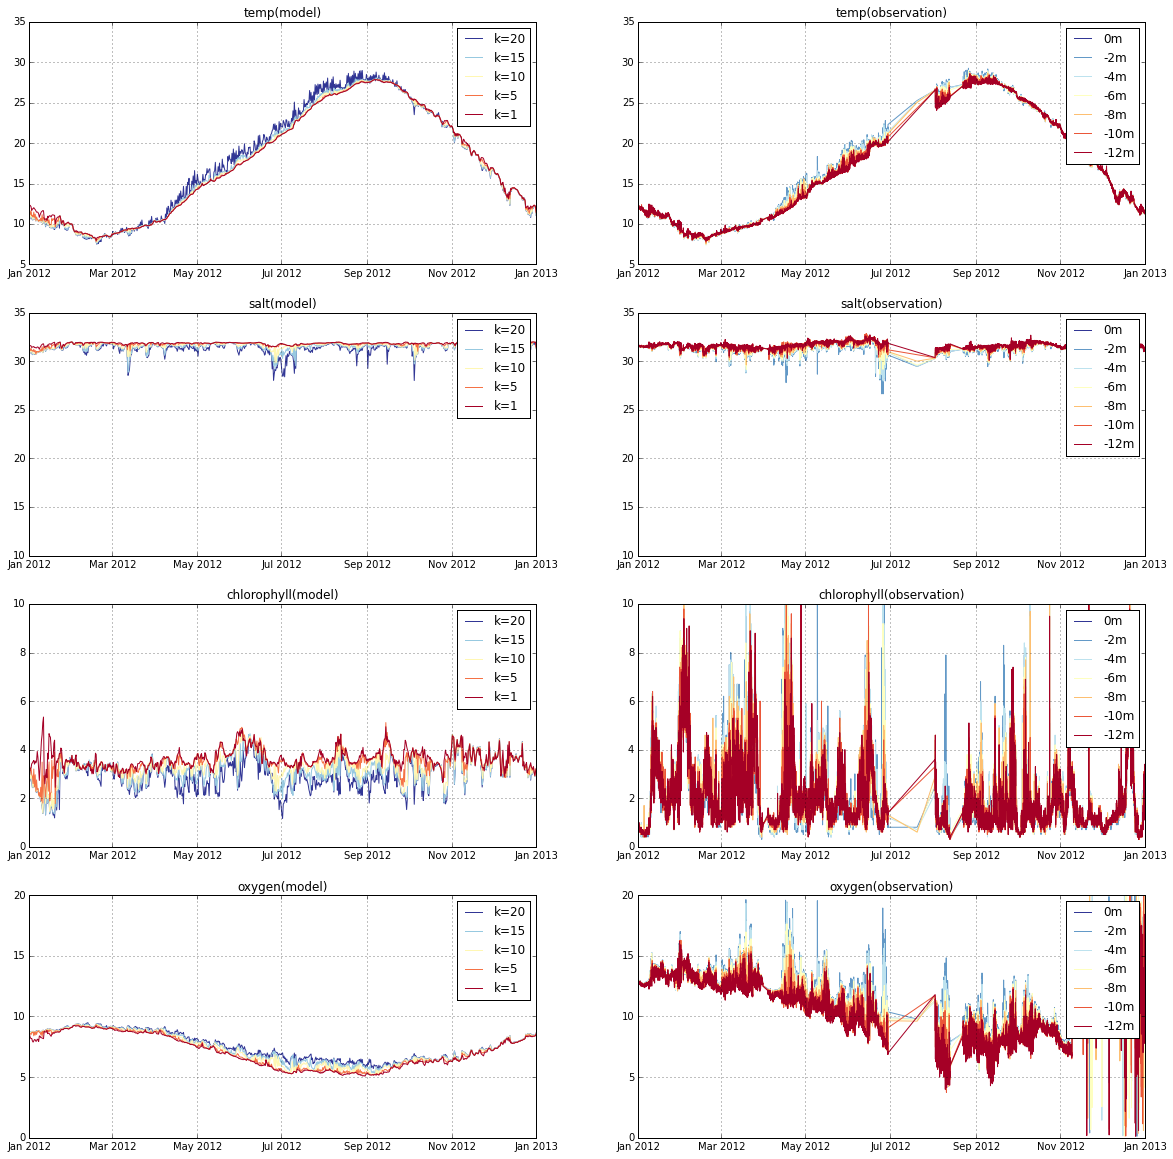

In [7]:
sta_plot(3)

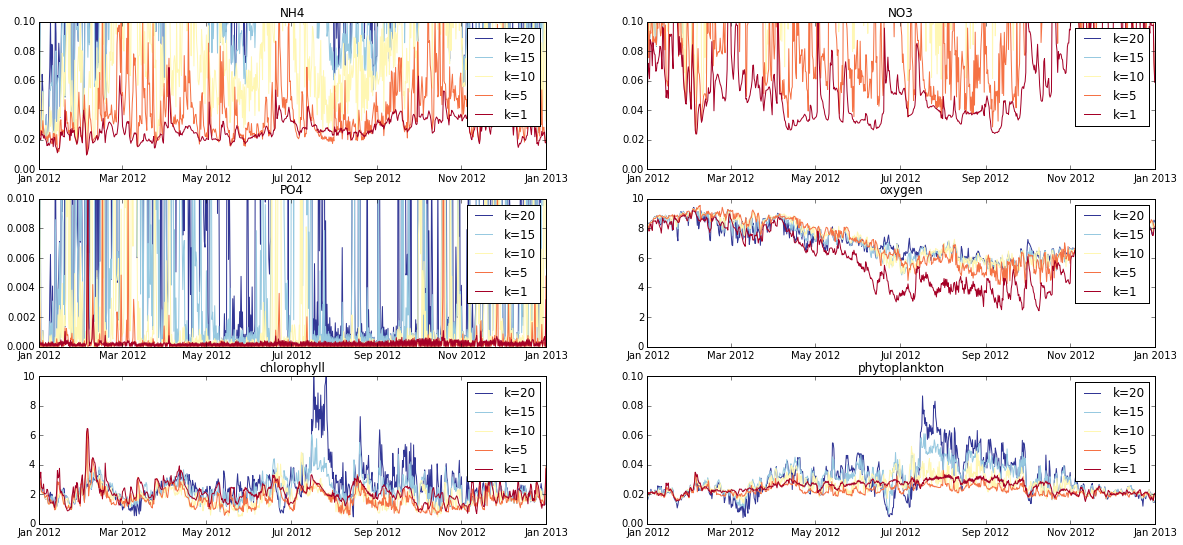

In [28]:
sta_plot(4)